In [71]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 150

In [13]:
csv_path = '/home/roman/data/Video_Games_Sales_as_at_22_Dec_2016.csv'
df = pd.read_csv(csv_path)

In [14]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df = df.dropna()
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre',
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
               ]

platforms = list(df['Platform'].value_counts().index.values)

In [21]:
sales_df_0 = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release', 'Platform']]
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]

In [17]:
def show_sales():
    sales_df.groupby('Year_of_Release').sum().plot()
    plt.show()

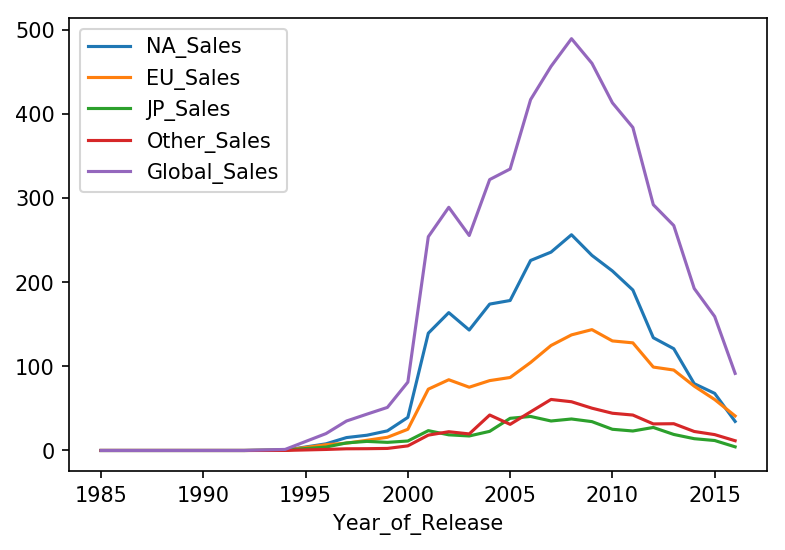

In [20]:
show_sales()

## Переключатель по разным платформам

In [45]:
def show_sales_by_platform(platform):
    sales_df_tmp = sales_df_0[sales_df_0['Platform'] == platform].drop(columns=['Platform'], axis=1)
    sales_df_tmp.groupby('Year_of_Release').sum().plot()
    plt.ylim(0, 300)
    plt.xlim(1995, 2016)
    plt.show()

In [46]:
interactive(show_sales_by_platform, platform=['X360', 'PC', 'PS2', 'PS3'])

A Jupyter Widget

In [48]:
def encode(df, columns, how):
    res_dicts = {}
    rev_dicts = {}
    for i, c in enumerate(columns):
        entities = df[c].value_counts().index.values
        if how[i] == 'by_order':
            entities = sorted(entities)
        labels = {entities[i]: i for i in range(len(entities))}
        df[c] = df[c].map(labels).ffill()
        res_dicts[c] = labels
        rev_dicts[c] = {v: k for (k, v) in labels.items()}
    return res_dicts, rev_dicts

## Ползунок по разным платформам

In [50]:
sales_df_01 = sales_df_0.copy()
res_dicts, rev_dicts = encode(sales_df_01, ['Platform'], how=['by_value_counts'])

In [51]:
def show_sales_by_encoded_platform(platform):
    sales_df_tmp = sales_df_01[sales_df_01['Platform'] == platform].drop(columns=['Platform'], axis=1)
    sales_df_tmp.groupby('Year_of_Release').sum().plot()
    plt.ylim(0, 300)
    plt.xlim(1995, 2016)
    plt.show()

In [56]:
print(rev_dicts)
interactive(show_sales_by_encoded_platform, platform=6)

{'Platform': {0: 'PS2', 1: 'X360', 2: 'PS3', 3: 'PC', 4: 'XB', 5: 'Wii', 6: 'DS', 7: 'PSP', 8: 'GC', 9: 'PS4', 10: 'GBA', 11: 'XOne', 12: '3DS', 13: 'PS', 14: 'PSV', 15: 'WiiU', 16: 'DC'}}


A Jupyter Widget

## Отсортируем платформы по самому ужачному году, и выведем их в таком порядке

In [57]:
x = []
for p in platforms:
    df_tmp = sales_df_0[sales_df_0['Platform'] == p]
    best_year = df_tmp[['Global_Sales', 'Year_of_Release']] \
        .groupby('Year_of_Release').sum().sort_values(by='Global_Sales').index.values[-1]
    x.append([p, best_year])
sorted_platforms = list(pd.DataFrame(data=x, columns=['platform', 'best_year']).sort_values(by='best_year')['platform'].values)

In [65]:
sorted_platforms_encoded = {x: i for i, x in enumerate(sorted_platforms)}

In [66]:
sales_df_02 = sales_df_0.copy()
sales_df_02['Platform'] = sales_df_02['Platform'].map(sorted_platforms_encoded).ffill()
sales_df_02.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_of_Release,Platform
0,41.36,28.96,3.77,8.45,82.53,2006,8
2,15.68,12.76,3.79,3.29,35.52,2008,8
3,15.61,10.93,3.28,2.95,32.77,2009,8
6,11.28,9.14,6.50,2.88,29.80,2006,6
7,13.96,9.18,2.93,2.84,28.92,2006,8


In [67]:
def show_sales_by_encoded_platform_sorted_by_best_year(platform):
    sales_df_tmp = sales_df_02[sales_df_02['Platform'] == platform].drop(columns=['Platform'], axis=1)
    sales_df_tmp.groupby('Year_of_Release').sum().plot()
    plt.ylim(0, 300)
    plt.xlim(1995, 2016)
    plt.show()

In [68]:
print(sorted_platforms_encoded)
interactive(show_sales_by_encoded_platform_sorted_by_best_year, platform=6)

{'DC': 0, 'PS': 1, 'GBA': 2, 'GC': 3, 'XB': 4, 'PS2': 5, 'DS': 6, 'PSP': 7, 'Wii': 8, 'X360': 9, 'PS3': 10, '3DS': 11, 'PC': 12, 'PSV': 13, 'WiiU': 14, 'PS4': 15, 'XOne': 16}


A Jupyter Widget

## Вывод простого неинтерактивного бара

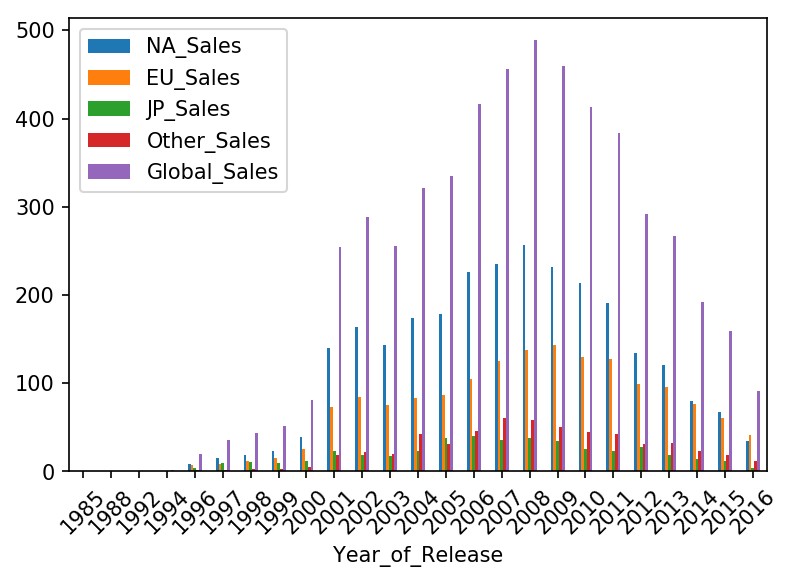

In [69]:
sales_df.groupby('Year_of_Release').sum().plot(kind='bar', rot=45)

# Seaborn

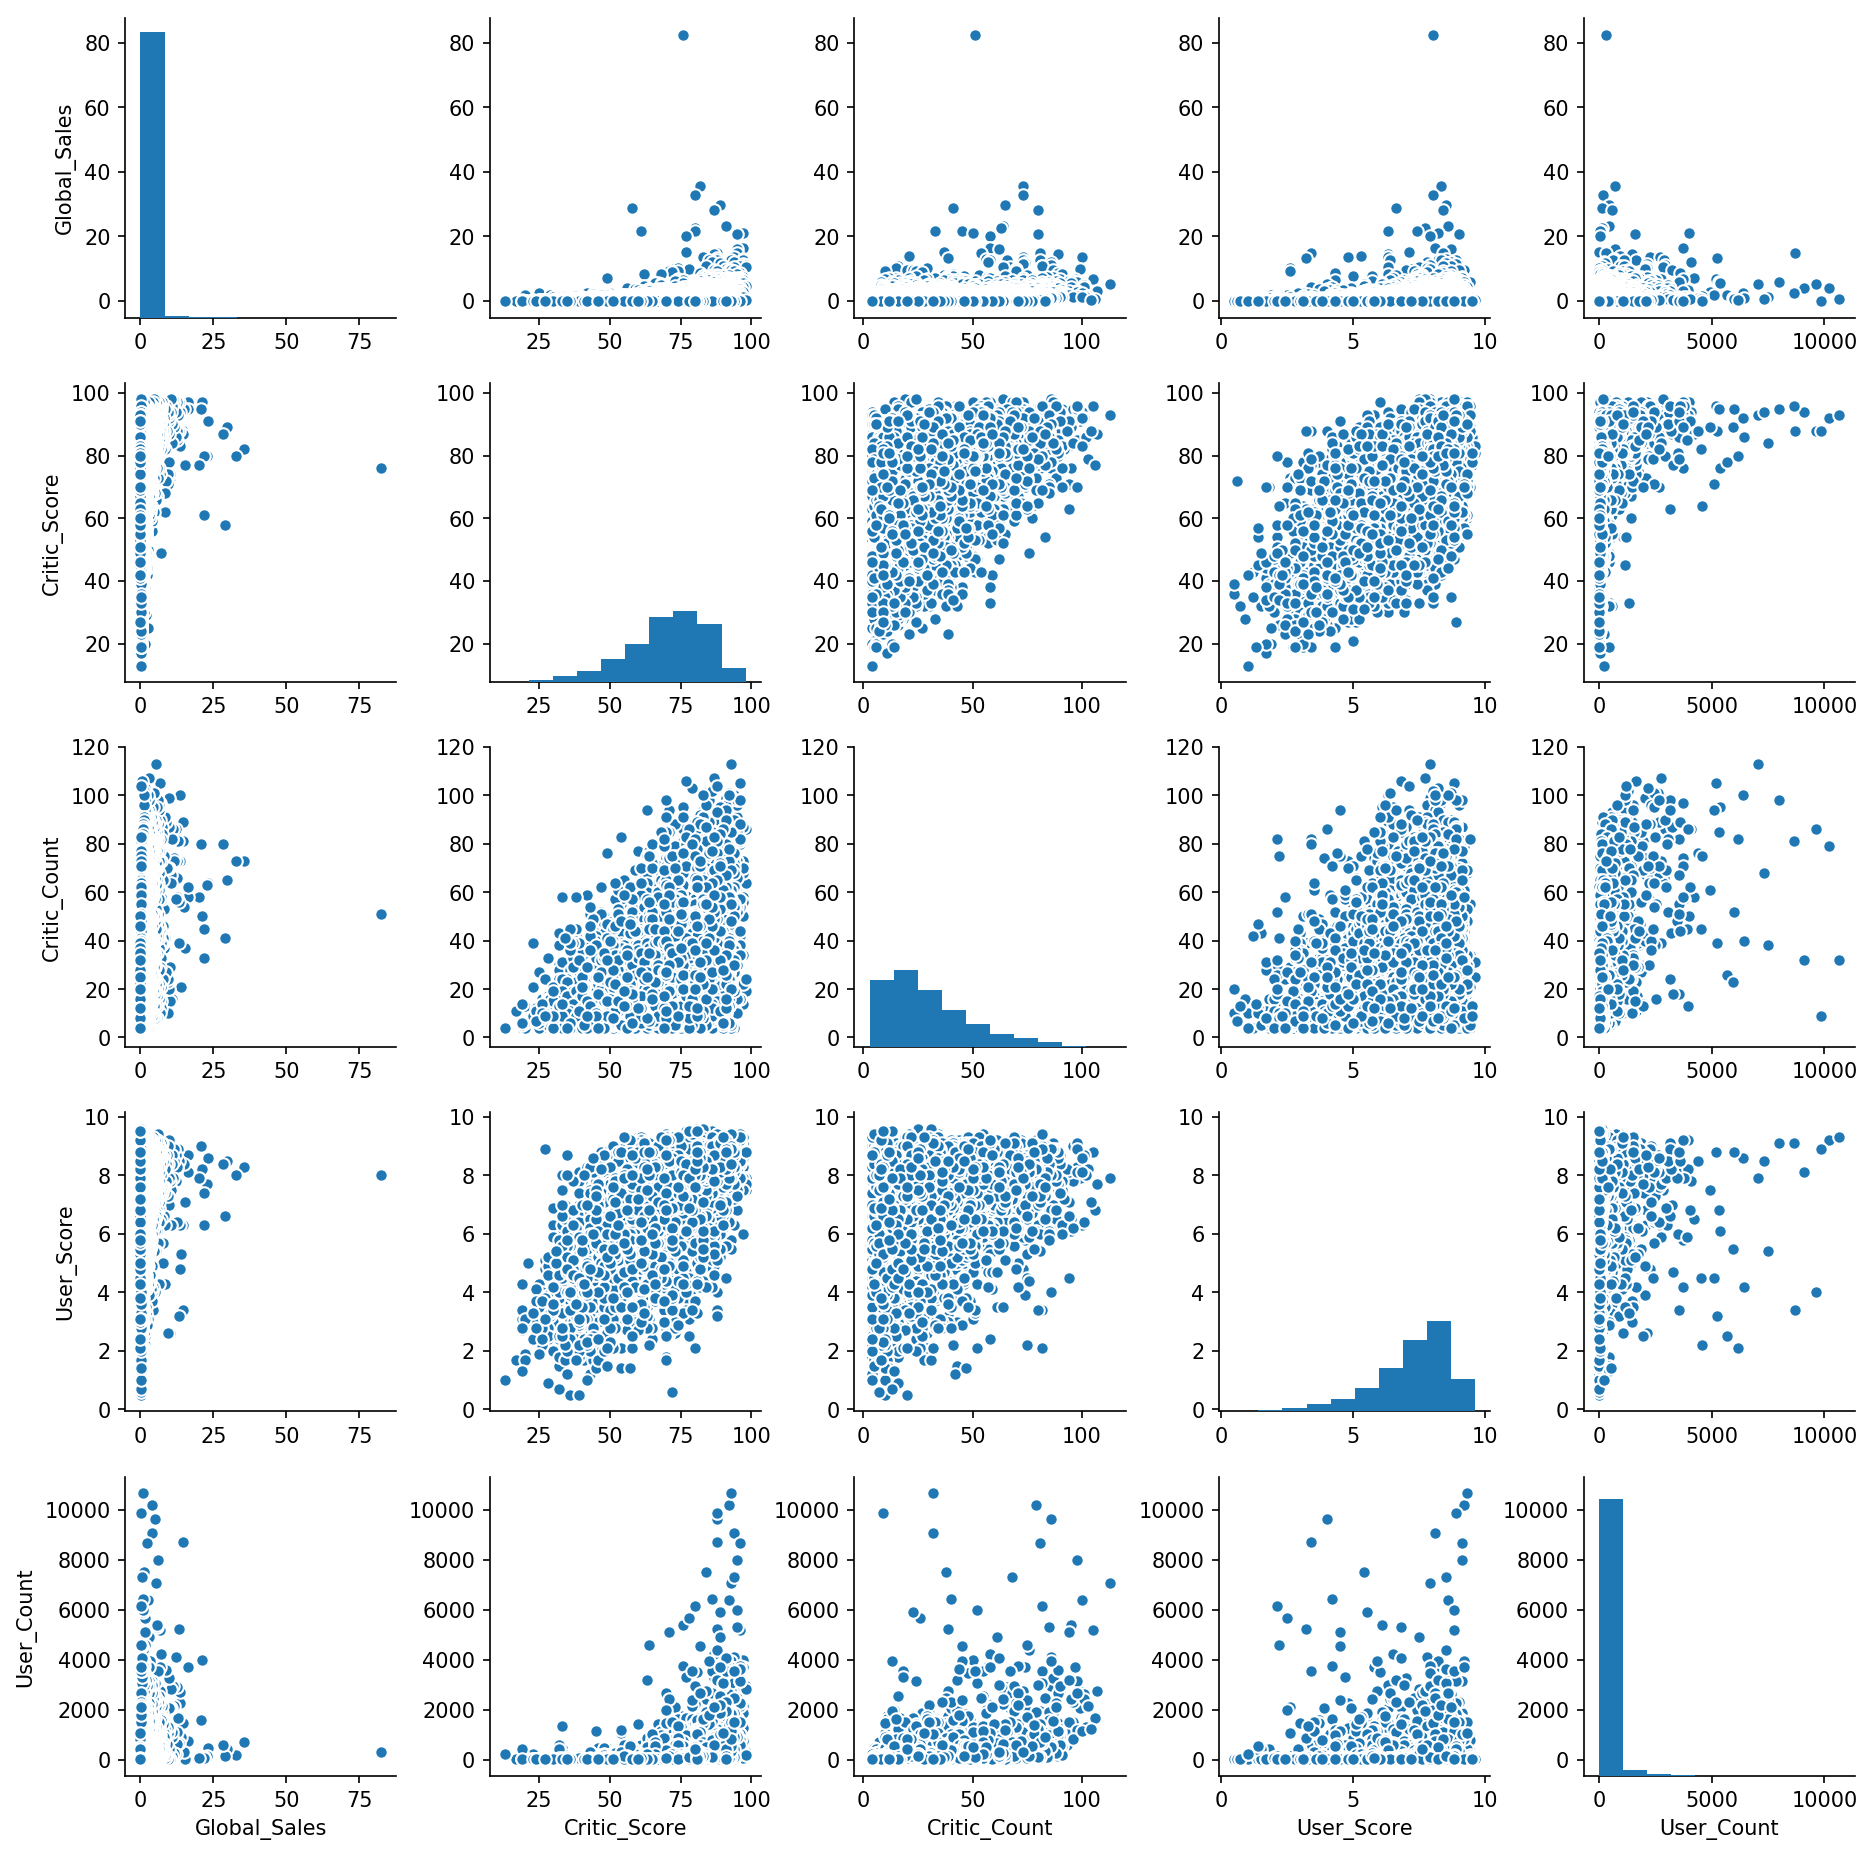

In [72]:
cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')